# CHAPTER 10 - SIMPLE LINEAR REGRESSION
## By Ereny Mikhail 

## What does a Simple Linear Regression Model do?
#### Simple Linear Regression Model is used to estmiate the relationship between two quantitative variables.


In [9]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
diamonds = sns.load_dataset('diamonds') 
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
-   The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. 
-   The possible range of values for the correlation coefficient is -1.0 to 1.0.
-   r of −1 indicates a perfect negative linear relationship between variables.
-   r of 0 indicates no linear relationship between variables.
-   r of 1 indicates a perfect positive linear relationship between variables.

In [11]:
data = sns.load_dataset('diamonds')
numeric_data = data.select_dtypes(include='number')
corr = numeric_data.corr()
corr.head(7)


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

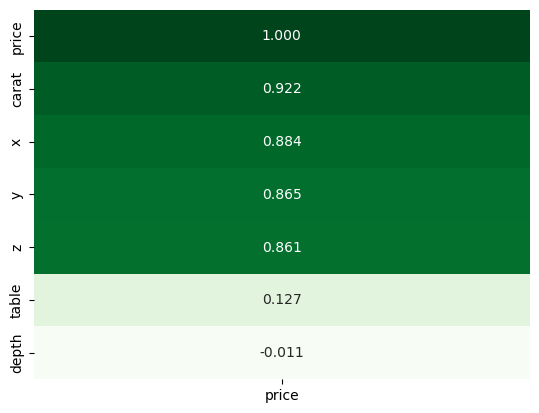

In [12]:
sns.heatmap(data=numeric_data.corr()[['price']].sort_values(by='price', ascending=False),
            annot=True, fmt='.3f', cmap='Greens', cbar=False)

## Procedure for Creating and Using a Regression Model
-  split dataset
-  create model from training database
-  validate model with test dataset
-  if model is valid predict data with in 


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[['carat']], data['price'], test_size=0.3, random_state=20)

In [16]:
linearModel= LinearRegression()

In [17]:
linearModel.fit(X_train, y_train)

LinearRegression()

In [18]:
linearModel.score(X_test, y_test)

0.8504107786474794

In [19]:
y_predicted = linearModel.predict(X_test)
y_predicted

array([9540.64191438, 1940.07543252, 3180.98424589, ..., 9618.19871522,
       -464.18539337, 5507.68827094])

In [22]:
predicted_df = pd.DataFrame({'predicted_price': y_predicted})
predicted_df.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [25]:
result_df = pd.DataFrame({
    'X_test': X_test.squeeze(),
    'y_test': y_test,
    'predicted_price': y_predicted
})
joined_data.head(5)

,caret,price,predicted_price
20244,1.52,8674,9540.641914
45013,0.54,1637,1940.075433
53351,0.70,2657,3180.984246
47212,0.59,1838,2327.859437
1460,0.86,2980,4421.893059


In [39]:
melted_df = pd.melt(result_df, id_vars=['X_test'], 
                    value_vars=['y_test','predicted_price'], 
                    var_name='price_type', value_name='price_value')
melted_df

,X_test,price_type,price_value
0,1.52,y_test,8674.000000
1,0.54,y_test,1637.000000
2,0.70,y_test,2657.000000
3,0.59,y_test,1838.000000
4,0.86,y_test,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


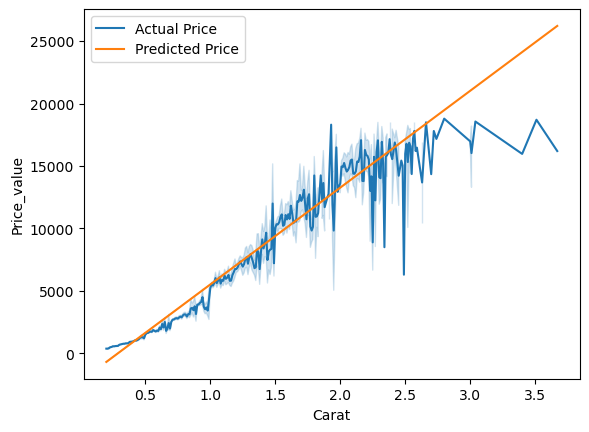

In [45]:
import matplotlib.pyplot as plt
sns.lineplot(x='X_test', y='y_test', data=result_df, label='Actual Price')
sns.lineplot(x='X_test', y='predicted_price', data=result_df, label='Predicted Price')
plt.xlabel('Carat')
plt.ylabel('Price_value')
plt.legend()
plt.show()

## Regression line equation is y = mx + b, where...
- y is the **dependent** variable
- m is the **slope** of the line
- x is the **independent** variable
- b is the **Y-intercept** 

In [46]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [47]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [48]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800453947


In [52]:
slope = 7756.42561797
intercept = -2256.360580045392
f_string = f"Regression line equation is y = {slope}x + {intercept}"
print(f_string )

Regression line equation is y = 7756.42561797x + -2256.360580045392


In [57]:
carat_value = 0.70
predicted_price = slope * carat_value + intercept
print(f"The predicted price for a {carat_value:.2f} carat diamond is ${predicted_price:,.2f}")

The predicted price for a 0.70 carat diamond is $3,173.14


In [58]:
carat_value = 0.54
predicted_price = slope * carat_value + intercept
print(f"The predicted price for a {carat_value:.2f} carat diamond is ${predicted_price:,.2f}")

The predicted price for a 0.54 carat diamond is $1,932.11


## Are the estimates in the previous two cells close to the predicted prices in the results of step 18?
#### yes, the estimates are few dollars off from step 18 but it is so close to the price.